# Result Summary

In this notebook I generate some graphs, which summarize the results of the 45 configurations I trained.  For my convenience, all the log files from the program were consolidated into a single file using the script ```gather_results.py```. 

There are a lot of arguments, but the ones we will be looking at here are:

- **patch:** size, scale,  num
- **model:** name, architecture, dropout
- **run:** score, time
- **augument:** -  (same data augumentation options were used for all runs)

---



## Import & Load Results...

In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if os.getcwd().split("/")[-1] !="project":
    os.chdir("..")

result_file="result/results.txt"

result = pd.read_csv(result_file)

use = ["patch.size", "patch.scale", "patch.num", "model.name", "model.architecture",
       "model.dropout", "run.time", "run.score"]
result=result[use]
result["run.time"] /= 3600 # In order to get time in hours 

# Ranking 

Sorted by validation dice scores

In [138]:

ok=result["patch.size"]==256

column_name = 'my_channel'
result.loc[ok,"patch.num"] =1
result.drop(columns=['model.name']).sort_values(by=['run.score'],ascending=False)


,patch.size,patch.scale,patch.num,model.architecture,model.dropout,run.time,run.score
42,128,1.00,10,dil_unet,0.25,1.071568,0.954843
17,128,1.00,10,vanilla_unet,0.00,1.012385,0.954454
44,128,1.00,10,dil_unet,0.00,1.036474,0.953647
1,128,1.00,10,vanilla_unet,0.25,1.012026,0.951889
39,64,1.00,10,dil_unet,0.00,0.384005,0.951013
18,128,1.00,10,rob_unet,0.25,1.126500,0.950942
7,64,1.00,10,vanilla_unet,0.00,0.342793,0.949300
0,64,1.00,10,vanilla_unet,0.25,0.378804,0.948112
37,64,1.00,10,dil_unet,0.25,0.385496,0.947977
2,128,1.00,5,vanilla_unet,0.00,0.510082,0.945945


## Dice Score Graphs per Architecture and Patch Size

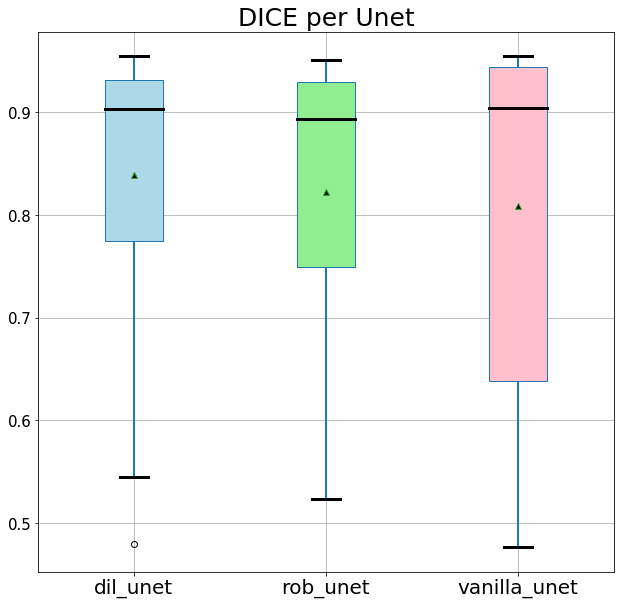

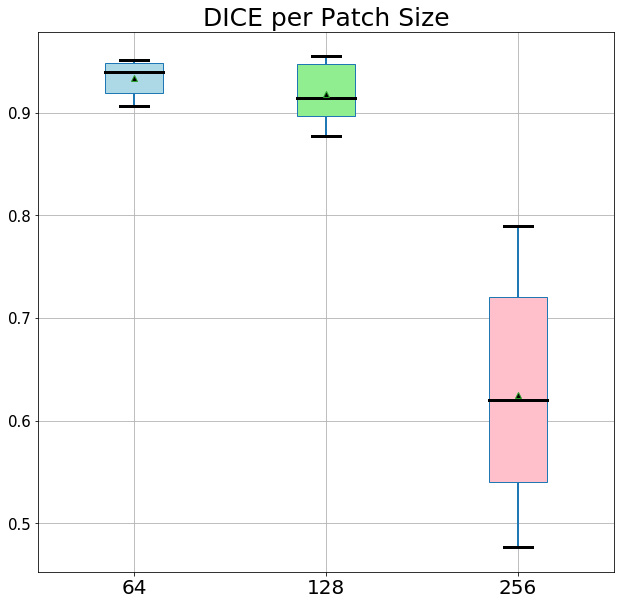

In [44]:
plotty = ["model.architecture","patch.size"]
title = ["Unet", "Patch Size"]

for i in range(len(plotty)):

    a = result.boxplot(column="run.score",by=plotty[i],patch_artist=True,return_type="dict",showmeans=True,figsize=(10,10))

    plt.suptitle("")

    # label adjustment
    p = plt.gca()

    p.set_xlabel("")
    p.set_title("DICE per "+title[i], fontsize=25)
    p.tick_params(axis='y', labelsize=15)
    p.tick_params(axis='x', labelsize=20)

    for i in range(3):
        a['run.score']['medians'][i].set_linewidth(3)
        a['run.score']['caps'][2*i].set_linewidth(3)
        a['run.score']['caps'][2*i+1].set_linewidth(3)
        a['run.score']['whiskers'][2*i].set_linewidth(2)
        a['run.score']['whiskers'][2*i+1].set_linewidth(2)
        a['run.score']['medians'][i].set_color('black')
        a['run.score']['means'][i].set_markerfacecolor('black')

    colors = ['lightblue', 'lightgreen', 'pink']
    for patch, color in zip(a['run.score']['boxes'], colors):
        patch.set_facecolor(color)
    


## Time Graphs per Architecture and Patch Size

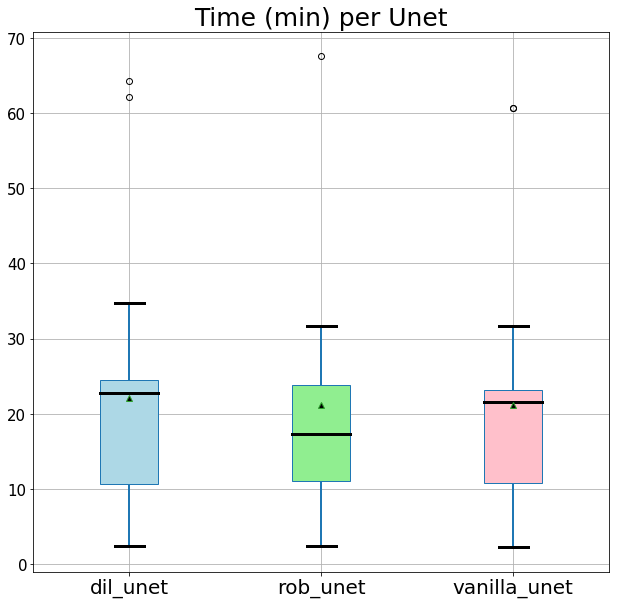

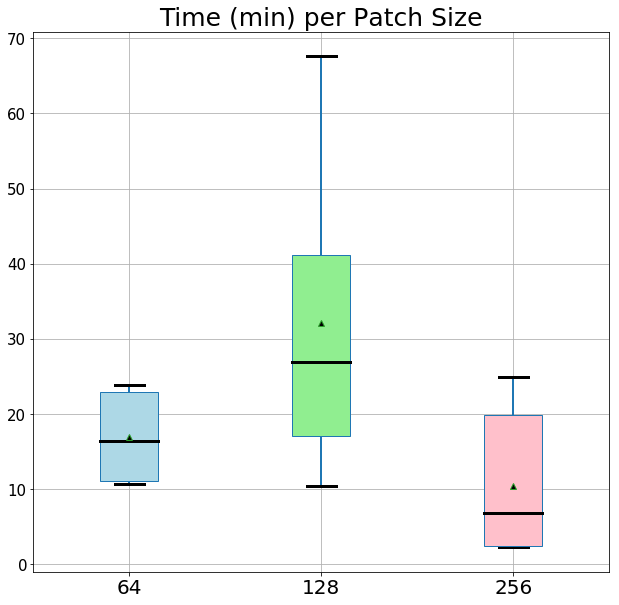

In [99]:
plotty = ["model.architecture","patch.size"]
title = ["Unet", "Patch Size"]
#result["run.time"] *= 60
for i in range(len(plotty)):

    a = result.boxplot(column="run.time",by=plotty[i],patch_artist=True,return_type="dict",showmeans=True,figsize=(10,10))

    plt.suptitle("")

    # label adjustment
    p = plt.gca()

    p.set_xlabel("")
    p.set_title("Time (min) per "+title[i], fontsize=25)
    p.tick_params(axis='y', labelsize=15)
    p.tick_params(axis='x', labelsize=20)

    for i in range(3):
        a['run.time']['medians'][i].set_linewidth(3)
        a['run.time']['caps'][2*i].set_linewidth(3)
        a['run.time']['caps'][2*i+1].set_linewidth(3)
        a['run.time']['whiskers'][2*i].set_linewidth(2)
        a['run.time']['whiskers'][2*i+1].set_linewidth(2)
        a['run.time']['medians'][i].set_color('black')
        a['run.time']['means'][i].set_markerfacecolor('black')

    colors = ['lightblue', 'lightgreen', 'pink']
    for patch, color in zip(a['run.time']['boxes'], colors):
        patch.set_facecolor(color)
    


## Training Graphs (Validation Dice Coeff vs Epoch)

In [5]:

van = os.listdir("result/vanilla_unet/") 
van = [v for i, v in enumerate(van) if ".npy" in v]
van = [v for i, v in enumerate(van) if "val_dice_coef" in v]
van = ["result/vanilla_unet/"+v for v in van]
van_epoch= np.zeros([len(van),100])
for i in range(len(van)):
    test = np.load(van[i])
#    if len(test)!=100:
    van_epoch[i,0:len(test)]=test
#    van_epoch[i]=test

rob=os.listdir("result/rob_unet/")
rob = [v for i, v in enumerate(rob) if ".npy" in v]
rob = [v for i, v in enumerate(rob) if "val_dice_coef" in v]
rob = ["result/rob_unet/"+v for v in rob]

rob_epoch= np.zeros([len(rob),100])
for i in range(len(rob)):
    test=np.load(rob[i])
#    if len(test)!=100

    rob_epoch[i,0:len(test)]=test
    
dil=os.listdir("result/dil_unet/") 
dil = [v for i, v in enumerate(dil) if ".npy" in v]
dil = [v for i, v in enumerate(dil) if "val_dice_coef" in v]
dil = ["result/dil_unet/"+v for v in dil]
        
dil_epoch= np.zeros([len(dil),100])
for i in range(len(dil)):
    test = np.load(dil[i])
 #   if len(test)!=100

    dil_epoch[i,0:len(test)]=test

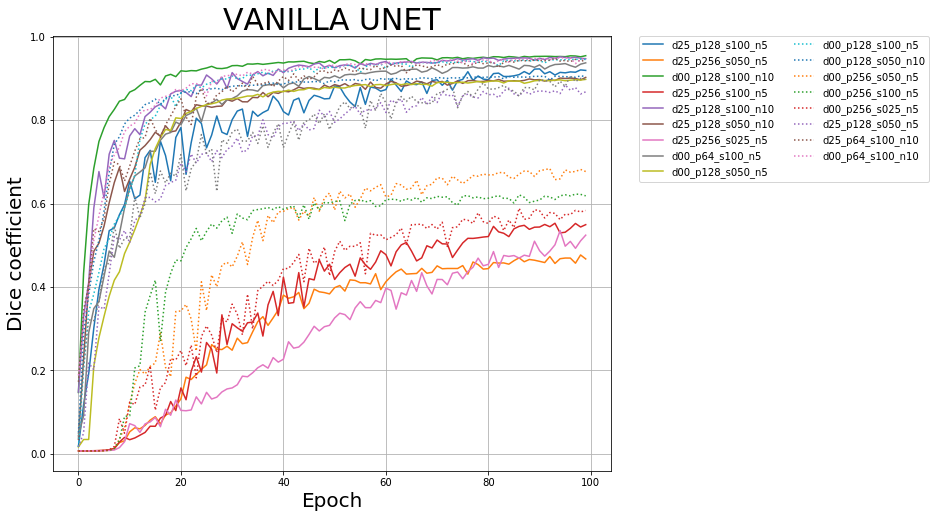

In [103]:
vanlab= np.array([r.split("/")[-1] for r in van])
vanlab= [r.split("_val")[0] for r in vanlab]
vanlab= [r.split("net_")[1] for r in vanlab]
fig=plt.figure(figsize = (10,8))
lines = ['solid', 'dashed']

for i in range(len(van)):
    rplot = np.load(van[i])
    ok = fig.add_subplot(1,1,1) 
    #plt.axis("off")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
           ncol=2, borderaxespad=0.)
    plt.xlabel("Epoch",size=20)
    if i>8: # there are 9 colours
        lionstyle = "dotted"
    else: 
        lionstyle="solid"
    plt.ylabel("Dice coefficient",size=20)
    plt.title("VANILLA UNET",size=30)
    plt.grid(1)
    #plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.plot(rplot,label=vanlab[i],linestyle=lionstyle)
    

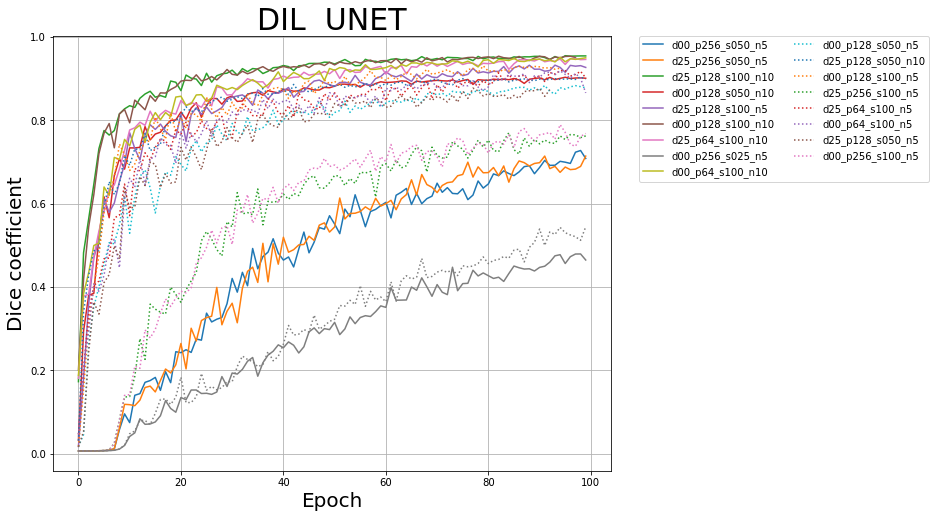

In [105]:
dillab= np.array([r.split("/")[-1] for r in dil])
dillab= [r.split("_val")[0] for r in dillab]
dillab= [r.split("net_")[1] for r in dillab]
fig=plt.figure(figsize = (10,8))

for i in range(len(dil)):
    rplot = np.load(dil[i])
    ok = fig.add_subplot(1,1,1) 
    #plt.axis("off")
    plt.grid(1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
           ncol=2, borderaxespad=0.)
    plt.xlabel("Epoch",size=20)
    plt.ylabel("Dice coefficient",size=20)
    plt.title("DIL  UNET",size=30)
    if i>8:
        lionstyle = "dotted"
    else: 
        lionstyle="solid"
    #plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.plot(rplot,label=dillab[i],linestyle=lionstyle)
    

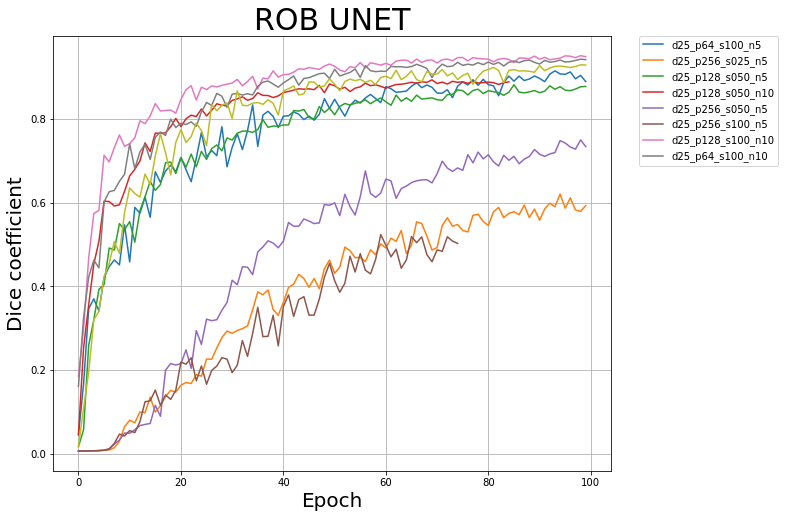

In [106]:
roblab= np.array([r.split("/")[-1] for r in rob])
roblab= [r.split("_val")[0] for r in roblab]
roblab= [r.split("net_")[1] for r in roblab]
fig=plt.figure(figsize = (10,8))

for i in range(len(rob)):
    rplot = np.load(rob[i])
    ok = fig.add_subplot(1,1,1) 
    #plt.axis("off")
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
           ncol=1, borderaxespad=0.)
    plt.xlabel("Epoch",size=20)
    plt.ylabel("Dice coefficient",size=20)
    plt.title("ROB UNET",size=30)
    if i>8:
        lionstyle = "dotted"
    else: 
        lionstyle="solid"
    #plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.plot(rplot,label=roblab[i],linestyle=lionstyle)
    